In [79]:
pix = 0.0225*2 #1pixel=0.0225µm
fociID = input()

4C


In [80]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
celldf = pd.read_csv('/Volumes/Kikuchi-SSD/160117F3-MuNS-Per-Formaldehyde/160117muNS-30deg-0.2mMIPTG1h-Formaldehyde15min-1minInt-Bin2-Tx300msGFP500ms_1/results/Results_pos%s.xls' %fociID,sep='\t')
celldf  = celldf.drop('Mean',1)
celldf = celldf.drop('X',1)
celldf = celldf.drop('Y',1)
celldf = celldf.drop('Perim.',1)
celldf = celldf.drop('Major',1)
celldf = celldf.drop('Minor',1)
celldf.Area = celldf.Area*(pix**2)
celldf.XM = celldf.XM*pix
celldf.YM = celldf.YM*pix
#celldf.head(3)

#Original data is in reverse-chronological because of backwards tracking in ImageJ
#Reverse order here so dataframe matches chronological order
celldf =celldf.reindex(index=celldf.index[::-1])
celldf = celldf.reset_index(drop=True)

focidf = pd.read_csv('/Volumes/Kikuchi-SSD/160117F3-MuNS-Per-Formaldehyde/160117muNS-30deg-0.2mMIPTG1h-Formaldehyde15min-1minInt-Bin2-Tx300msGFP500ms_1/FociResults/FociResults_Pos%s.xls'%fociID,sep='\t')


focidf = focidf.drop('Label', 1)
focidf = focidf.drop('Min', 1)
focidf = focidf.drop('Max', 1)
focidf = focidf.drop('Slice', 1)
focidf = focidf.drop(399) #the cell ROI data lacks the first slice, so delete it here to match
focidf.XM = focidf.XM*pix
focidf.YM = focidf.YM*pix
focidf =focidf.reindex(index=focidf.index[::-1])
focidf = focidf.reset_index(drop=True)
cellfocidisp = ((celldf.XM-focidf.XM)**2+(celldf.YM-focidf.YM)**2)**(1/2) 
#cellfocidisp.plot(label = 'Distance between Cell Center and Foci').legend(loc='upper left', bbox_to_anchor=(1, 0.5))
brightness = pd.read_csv('/Volumes/Kikuchi-SSD/160117F3-MuNS-Per-Formaldehyde/160117muNS-30deg-0.2mMIPTG1h-Formaldehyde15min-1minInt-Bin2-Tx300msGFP500ms_1/BrightnessResults/BrightnessResults_Pos%s.xls'%fociID,sep='\t')
brightness = brightness.drop('Min',1)
brightness = brightness.drop(' ',1)
brightness = brightness.drop(399)
cellx = celldf['XM']
celly = celldf['YM']
focix = focidf['XM']
fociy = focidf['YM']
celldisp = pd.Series(((cellx[i+1]-cellx[i])**2+(celly[i+1]-celly[i])**2)**(1/2) for i in range (len(cellx)-1))
#print(polardisp[cartdispv > 0.15])
cartdispv = pd.Series(((focix[i+1]-focix[i]-cellx[i+1]+cellx[i])**2+(fociy[i+1]-fociy[i]-celly[i+1]+celly[i])**2)**(1/2) for i in range (len(cellx)-1))

rad = np.radians(celldf['Angle']) #convert cell ROI long axis angle to radians
radfoci = rad-np.arctan2(focidf['YM'],focidf['XM']) #convert foci polar coordinate theta taking into account the ROI's angle

polardisp= pd.Series((cellfocidisp[i+1]**2+cellfocidisp[i]**2-2*cellfocidisp[i]*cellfocidisp[i+1]*np.cos(radfoci[i+1]-radfoci[i]))**(1/2) for i in range (len(cellfocidisp)-1))

#polardisp.plot(label = 'Polar Displacement',lw=1).legend(loc='center left', bbox_to_anchor=(1, 0.5))

polardf=pd.DataFrame()
polardf['r'] = cellfocidisp
polardf['theta'] = radfoci
polardf['rcostheta'] = cellfocidisp*np.cos(radfoci)

for x in polardisp:
    if x>0.1:
        cartdispv[polardisp == x] = cartdispv.mean()
        polardisp[polardisp == x] = polardisp.head(10).mean()
        
focix = focidf['XM']
fociy = focidf['YM']
cartdisp = pd.Series(((focix[i+1]-focix[i])**2+(fociy[i+1]-fociy[i])**2)**(1/2) for i in range (len(focix)-1))
#cartdisp2 = pd.Series(np.linalg.norm(a-b))
#cartdisp.plot(label = 'Cartesian Displacement',lw=1).legend(loc='center left', bbox_to_anchor=(1, 0.5))

preradigy = pd.Series((x-polardf.rcostheta.mean())**2 for x in polardf.rcostheta)
radigy= np.sqrt(preradigy.mean())

formaldehyde = pd.DataFrame({'Fluorescence_Intensity':brightness.Max.head(10).mean(),
                         'Mean_Polar_Displacement': polardisp.mean(),
                             'SEM_Polar_Displacement': polardisp.std()/np.sqrt(len(polardisp)),
                          'CV_Polar_Displacement': polardisp.std()/polardisp.mean(),
                          'Radius_Gyration':radigy},index = [fociID])
formaldehyde.index.name = 'Foci_ID'
formaldehyde.to_csv('/Volumes/Kikuchi-SSD/160117F3-MuNS-Per-Formaldehyde/160117muNS-30deg-0.2mMIPTG1h-Formaldehyde15min-1minInt-Bin2-Tx300msGFP500ms_1/Python_Processed'+'/GeneralData/data_%s.csv'%fociID, sep=',')

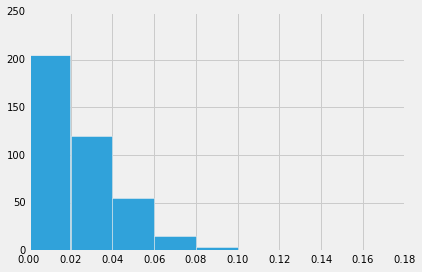

In [73]:
polardisp.hist(bins=np.arange(0,0.2,0.02))

In [81]:
%matplotlib inline
import glob, os, pandas as pd, numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
directory = '/Volumes/Kikuchi-SSD/160117F3-MuNS-Per-Formaldehyde/160117muNS-30deg-0.2mMIPTG1h-Formaldehyde15min-1minInt-Bin2-Tx300msGFP500ms_1/Python_Processed'
os.chdir(directory)
totdf = pd.DataFrame
contentlist = []
for path in glob.glob("GeneralData/data_*.csv"):
    df = pd.read_csv(path, header=0)
    contentlist.append(df)
    totdf = pd.concat(contentlist)

In [82]:
totdf

,Foci_ID,CV_Polar_Displacement,Fluorescence_Intensity,Mean_Polar_Displacement,Radius_Gyration,SEM_Polar_Displacement
0,4C,0.603106,551.0,0.033186,0.018040,0.001003
0,4A,0.618773,539.7,0.031485,0.044961,0.000977
0,4B,0.735420,717.2,0.024139,0.078797,0.000890


In [56]:
totdf.Mean_Polar_Displacement.mean()

0.02960308096618883

In [57]:
totdf.Radius_Gyration.mean()

0.047265842276555205

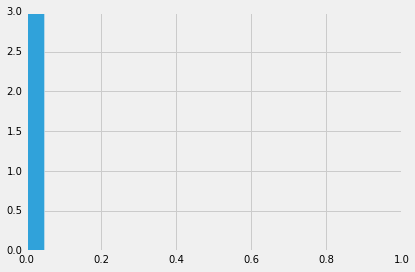

In [67]:
totdf.Mean_Polar_Displacement.hist(bins=np.arange(0,1,0.05))